In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [18]:
dtypes_clk = { "advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "country_code": "category", 
               "latitude": np.float16, "longitude": np.float16, "wifi_connection": "category", "carrier_id": np.float16,
               "trans_id": "object", "os_major":np.float32, "brand": np.float16, "touchX": np.float16,
               "touchY": np.float16  }

In [19]:
clicks = pd.read_csv('data/clicks.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_clk)

In [20]:
clicks['created'] = pd.to_datetime(clicks['created'])

In [21]:
for col in ['advertiser_id', 'source_id', 'country_code', 'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'os_minor', 'os_major', 'specs_brand', 'ref_type']:
    clicks[col] = clicks[col].astype('category')

## **Analisis inicial**

In [22]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.206055,1.070312,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218750,1.071289,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.206055,1.070312,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.206055,1.070312,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.206055,1.070312,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525


In [23]:
len(clicks)

26351

In [24]:
clicks.isnull().sum()
# action_id, agent_device y brand son casi todo Null #

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [25]:
clicks['wifi_connection'].value_counts()
# Todos los valores son False, no aporta informacion relevante #

False    26351
Name: wifi_connection, dtype: int64

## 1 - HeatMap de los clicks en la pantalla del dispositivo

In [26]:
#redondeo decimales asi coinciden varios valores, sino son todos unicos
clicks['X'] = clicks['touchX'].round(1)
clicks['Y'] = clicks['touchY'].round(1)

clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,X,Y
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.206055,1.070312,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093,0.899902,0.099976
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218750,1.071289,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,NaN,NaN
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.206055,1.070312,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647,0.899902,0.500000
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.206055,1.070312,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525,0.000000,0.399902
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.206055,1.070312,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525,0.099976,0.399902


In [27]:
#me quedo solo con lo que me interesa y quito Nans mas adelante
filtered = clicks.filter(items=['X', 'Y'])

In [28]:
filtered = filtered.dropna()

In [29]:
#agrego una columna que contara apariciones
filtered['values'] = 1

In [30]:
#pivoteo cosmico
nuevo = filtered.pivot_table(index='X', columns='Y',values='values' ,fill_value=0, aggfunc=np.sum).T

nuevo.head()

X,0.0,0.0999755859375,0.199951171875,0.300048828125,0.39990234375,0.5,0.60009765625,0.7001953125,0.7998046875,0.89990234375,1.0
Y,,,,,,,,,,,
0.000000,111,121,81,78,59,72,91,111,203,768,833
0.099976,175,137,63,57,47,61,82,57,158,918,1080
0.199951,63,84,65,58,40,66,69,69,115,164,149
0.300049,61,70,48,45,38,72,82,78,118,108,73
0.399902,90,126,57,59,68,59,100,107,136,230,126


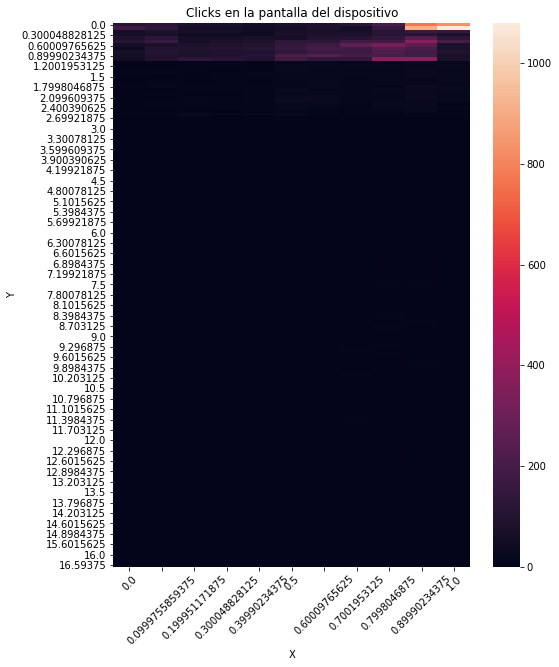

In [64]:
#resize del heatmap
plt.figure(figsize=(8, 10))

grph1 = sns.heatmap(nuevo)
grph1.set_title('Clicks en la pantalla del dispositivo')
plt.xticks(rotation=45);

## 2 - Canidad de clicks en funcion del timeToClick

In [32]:
clicks['timeToClick'].describe()

count    22977.000000
mean       230.403309
std        976.849149
min          0.017000
25%          2.915000
50%         10.588000
75%         71.703000
max      17616.188000
Name: timeToClick, dtype: float64

Debido a la variacion de los datos, se trabajara con aquellos clicks que se hicieron en menos
de 75 segundos.

In [33]:
asd = clicks.loc[(clicks['timeToClick']) < 75, ['timeToClick']]
asd.head()

,timeToClick
0,1.563
3,19.013
4,28.110
8,3.129
9,1.707


Se puede ver que la tendencia es hacer el click rapidamente

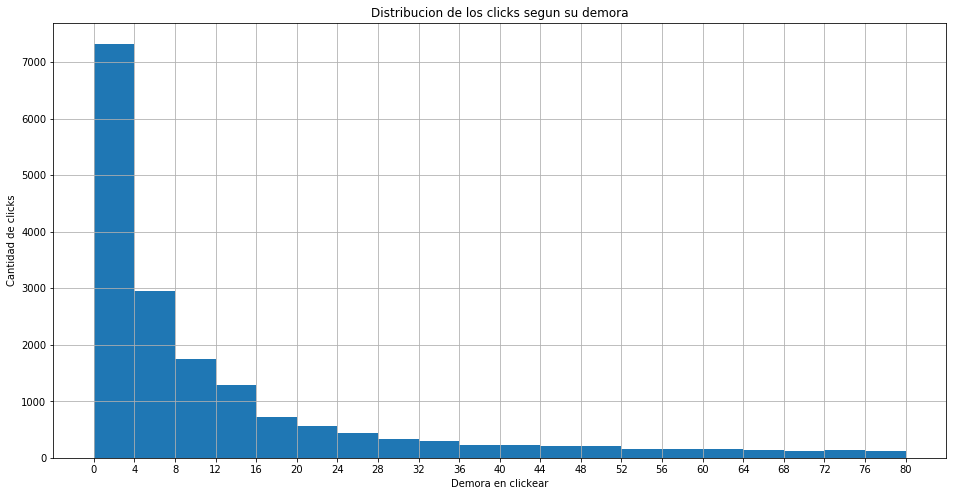

In [76]:
bins = np.linspace(0,80,21)
plt.figure(figsize=(16,8))
grph2 = plt.hist(clicks.timeToClick, bins = bins)
plt.xticks(bins)
plt.grid()
plt.ylabel('Cantidad de clicks')
plt.xlabel('Demora en clickear')
plt.title('Distribucion de los clicks segun su demora');

## 3 - Cantidad de clicks por hora

In [35]:
clicks['hour'] = clicks['created'].dt.hour

In [36]:
clicks_graficable = clicks.groupby('hour').agg({ 'hour' :'count'})

In [37]:
clicks_graficable.columns = ['count']

In [38]:
clicks_graficable.reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,440,4209,2327,754,1079,945,678,518,537,754,...,834,959,966,641,655,380,389,451,1386,2726


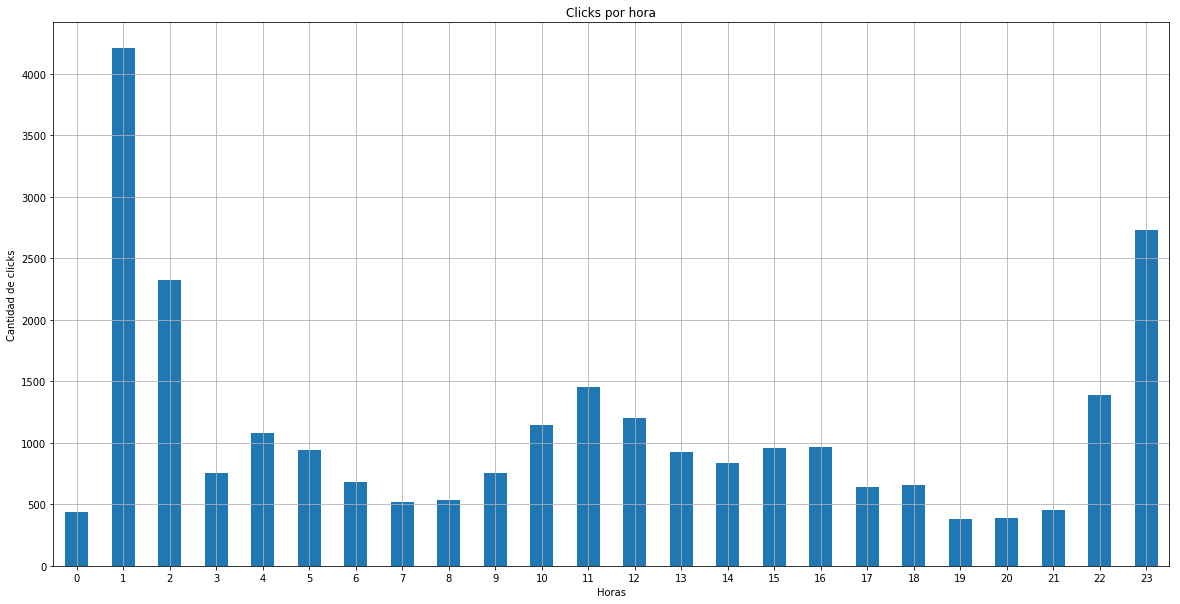

In [79]:
grph2 = clicks_graficable.plot.bar(grid = True, figsize = (20,10), title = 'Clicks por hora', rot = 0, legend = False)
grph2.set_xlabel('Horas')
grph2.set_ylabel('Cantidad de clicks');

## 4 - Cantidad de clicks por dia de la semana

In [133]:
clicks['day_of_week'] = clicks['created'].dt.dayofweek

In [134]:
clicks['day'] = clicks['created'].dt.day

In [144]:
graficable_day_of_week = clicks.groupby(['day_of_week', 'day']).agg({'day_of_week':'count'})

In [158]:
graficable_day_of_week

,count,alias
day_of_week,,
0,4557,Lunes
1,5235,Martes
2,3482,Miercoles
3,2989,Jueves
4,2839,Viernes
5,3283,Sabado
6,3966,Domingo


Vamos a descartar los dias 5 y 6 debido a sus valores anormalmente bajos

In [145]:
graficable_day_of_week = graficable_day_of_week.loc[[(0,11),(1,12),(2,13),(3,7),(4,8),(5,9),(6,10)]]

In [146]:
graficable_day_of_week = clicks.groupby(['day_of_week']).agg({'day_of_week':'count'})

In [147]:
graficable_day_of_week.columns = ['count']

In [160]:
graficable_day_of_week['alias'] = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']

In [163]:
graficable_day_of_week.set_index('alias', drop = True, inplace = True)

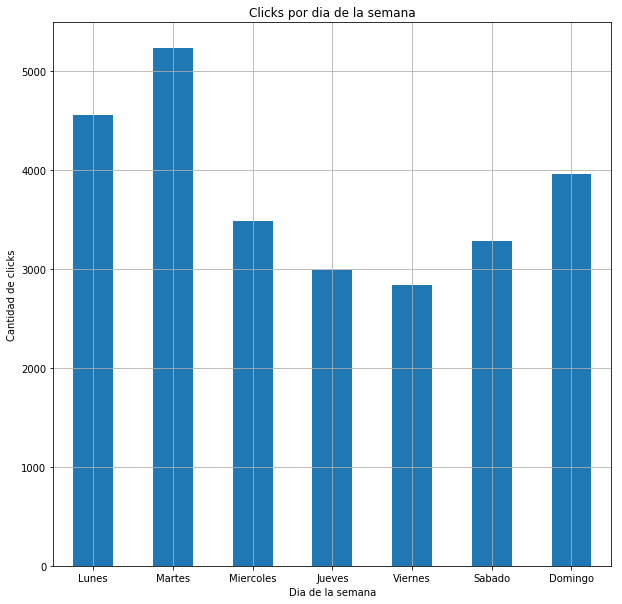

In [165]:
grph4 = graficable_day_of_week.plot.bar( figsize = (10,10), grid = True, rot = 0, legend = False , title = 'Clicks por dia de la semana')
grph4.set_ylabel("Cantidad de clicks")
grph4.set_xlabel("Dia de la semana");

## 5 - Cantidad de clicks por dia

In [98]:
clicks['day'] = clicks['created'].dt.day

In [99]:
graficable_dias = clicks.groupby(['day']).agg({'day':'count'})

In [100]:
graficable_dias.columns = ['count']

In [101]:
graficable_dias

,count
day,
5,31
6,14
7,2989
8,2839
9,3283
10,3966
11,4557
12,5204
13,3468


Vamos a descartar los dias 5 y 6 debido a sus valores anormalmente bajos

In [105]:
graficable_dias = graficable_dias.loc[[7,8,9,10,11,12,13]]

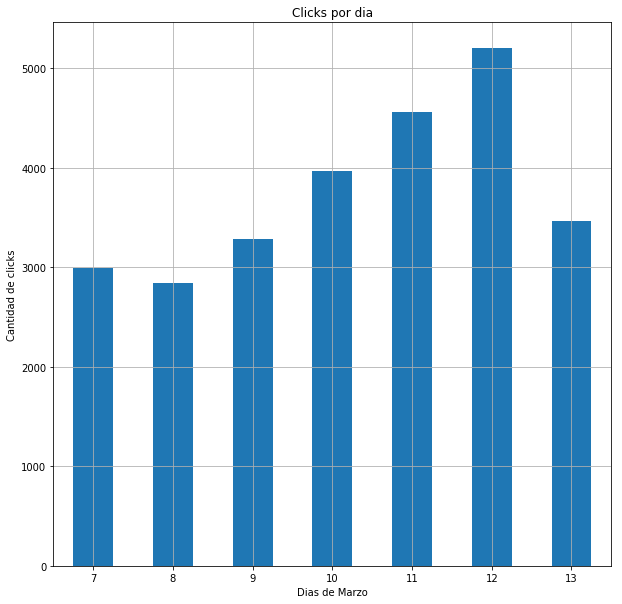

In [107]:
grph5 = graficable_dias.plot.bar(figsize= (10,10), grid = True, title = 'Clicks por dia', legend = False, rot =0)
grph5.set_ylabel("Cantidad de clicks")
grph5.set_xlabel("Dias de Marzo");